In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings

In [2]:
#library Settings

warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [3]:
# --- Create List of Color Palletes ---
cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']


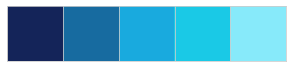

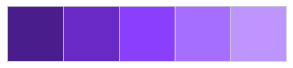

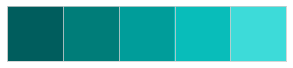

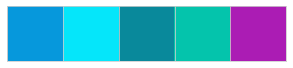

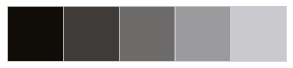

In [4]:
#Plot color Palletes

sns.palplot(cyan_grad)
sns.palplot(purple_grad)
sns.palplot(teal_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [5]:
#importing Dataset

df = pd.read_csv("Downloads/train_v9rqX0R.csv")

In [6]:
#reading dataset

df.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,nan,Tier 3,Grocery Store,732.380000
NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200


In [7]:
#printing dataset information

print("\033[1;37;40m Dataset Info \n")
print('\033[0m\033[36m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[36m\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[36m\033[1m', df.shape[1])
print('\033[0m\033[36m*' * 20)
print('\n')

# --- Print Dataset Detail ---
print("\033[1;37;40m Dataset Details \n")
print('\033[0m\033[36m*' * 22 +'\033[0m')
df.info(memory_usage = False)

 Dataset Info 

********************
Total Rows: 8523
Total Columns: 12
********************


 Dataset Details 

**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales      

In [8]:
# Initial data Exploration

#Categorial variables

print('\033[0m\033[36m*' * 20)
print('\n')
print("\033[1;37;40m Item Identifier Values \n")
print('\033[0m\033[36m*' * 20)
df.Item_Identifier.value_counts(dropna=False)


********************


 Item Identifier Values 

********************


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

*****************************
.: Item Fat Content Total :.
*****************************


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

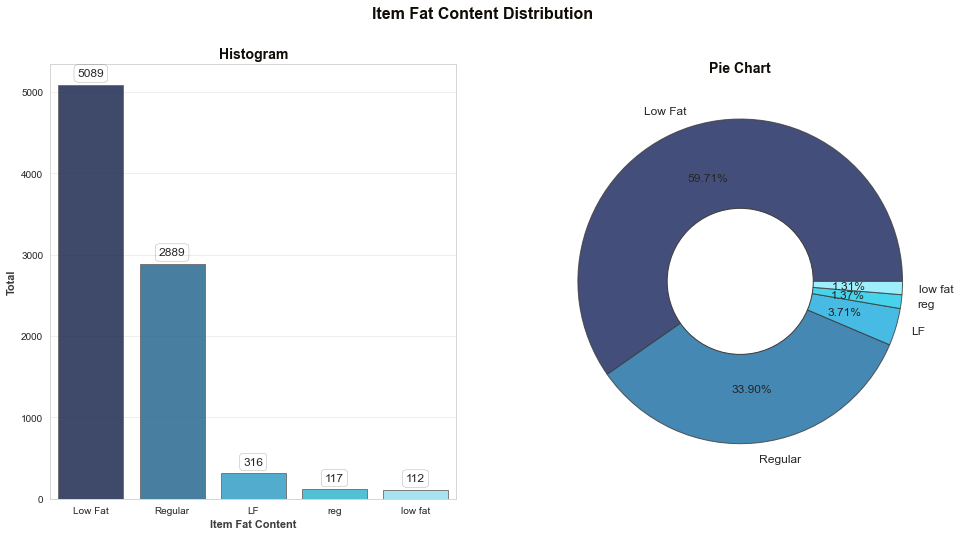

In [9]:
# Setting colors, labels, order
colors = cyan_grad
labels = df['Item_Fat_Content'].dropna().unique()
order = df['Item_Fat_Content'].value_counts().index

plt.figure(figsize=(16,8))
plt.suptitle('Item Fat Content Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Item_Fat_Content', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))

plt.xlabel('Item Fat Content', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Item_Fat_Content'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 29)
print('\033[1m'+'.: Item Fat Content Total :.'+'\033[0m')
print('\033[36m*' * 29+'\033[0m')
df.Item_Fat_Content.value_counts(dropna=False)

In [10]:
colors = teal_grad
labels = df['Item_Type'].dropna().unique()
order = df['Item_Type'].value_counts().index

#count categorial labels without Droping null values
print('\033[36m*' * 21)
print('\033[1m'+'.: Item Type List :.'+'\033[0m')
print('\033[36m*' * 21+'\033[0m')
df.Item_Type.value_counts(dropna=False)

*********************
.: Item Type List :.
*********************


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

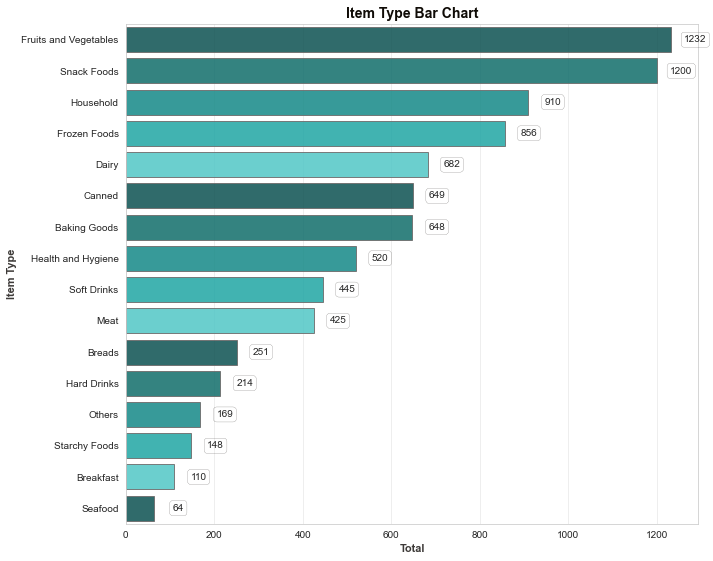

In [11]:
# --- Histogram ---
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='Item_Type', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width+55, y+height/2, '{:.0f}'.format(width), horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.title('Item Type Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Item Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x', alpha=0.4);


******************************
.: Outlet Identifier Total :.
******************************


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

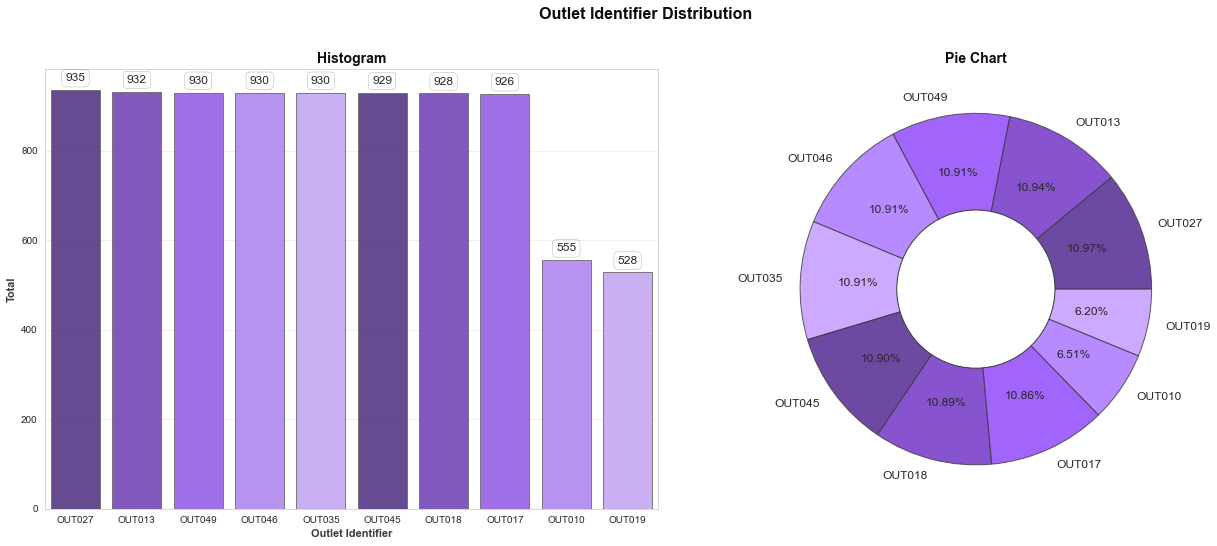

In [12]:
colors = purple_grad
labels = df['Outlet_Identifier'].dropna().unique()
order = df['Outlet_Identifier'].value_counts().index



# --- Size for Both Figures ---
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Identifier Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Identifier', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20,rect.get_height(), horizontalalignment='center', 
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.965])
plt.xlabel('Outlet Identifier', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Outlet_Identifier'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 30)
print('\033[1m'+'.: Outlet Identifier Total :.'+'\033[0m')
print('\033[36m*' * 30+'\033[0m')
df.Outlet_Identifier.value_counts(dropna=False)

*************************
.: Outlet Size Total :.
*************************


Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

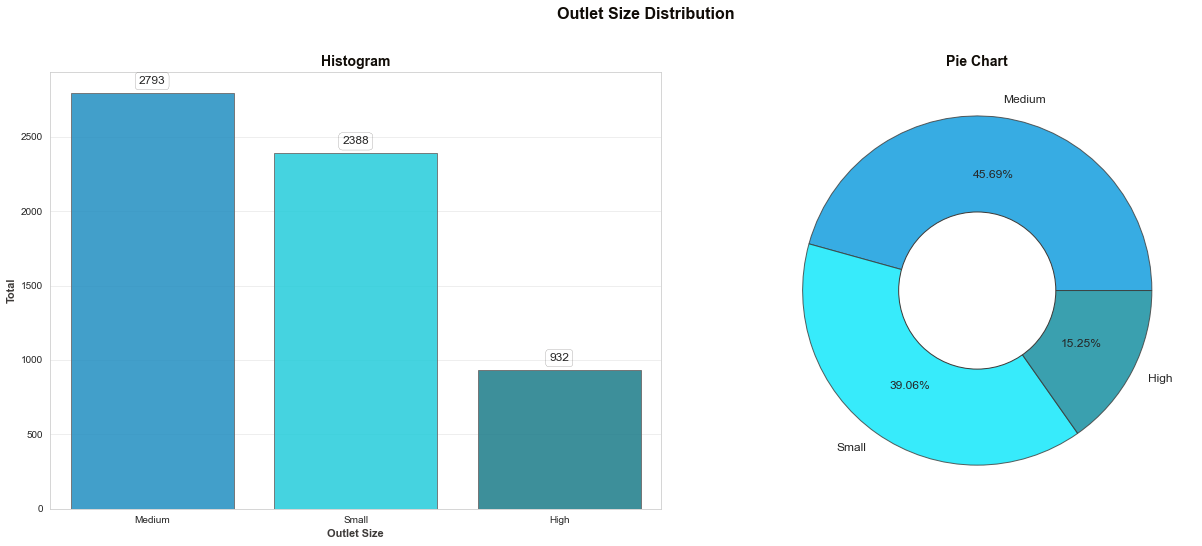

In [13]:
colors = color_mix
labels = df['Outlet_Size'].dropna().unique()
order = df['Outlet_Size'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Size Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Size', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', 
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Size', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Outlet_Size'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 25)
print('\033[1m'+'.: Outlet Size Total :.'+'\033[0m')
print('\033[36m*' * 25+'\033[0m')
df.Outlet_Size.value_counts(dropna=False)

****************************
.: Outlet Location Total :.
****************************


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

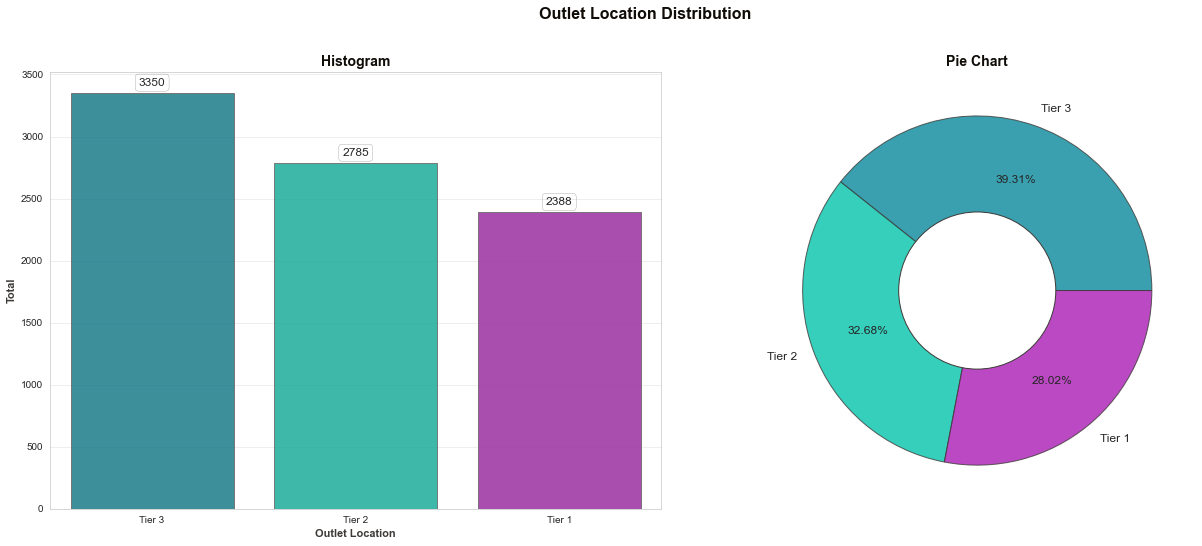

In [14]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:5]
labels=df['Outlet_Location_Type'].dropna().unique()
order=df['Outlet_Location_Type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Location Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Location_Type', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', 
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Location', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Outlet_Location_Type'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 28)
print('\033[1m'+'.: Outlet Location Total :.'+'\033[0m')
print('\033[36m*' * 28+'\033[0m')
df.Outlet_Location_Type.value_counts(dropna=False)

************************
.: Outlet Type Total :.
************************


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

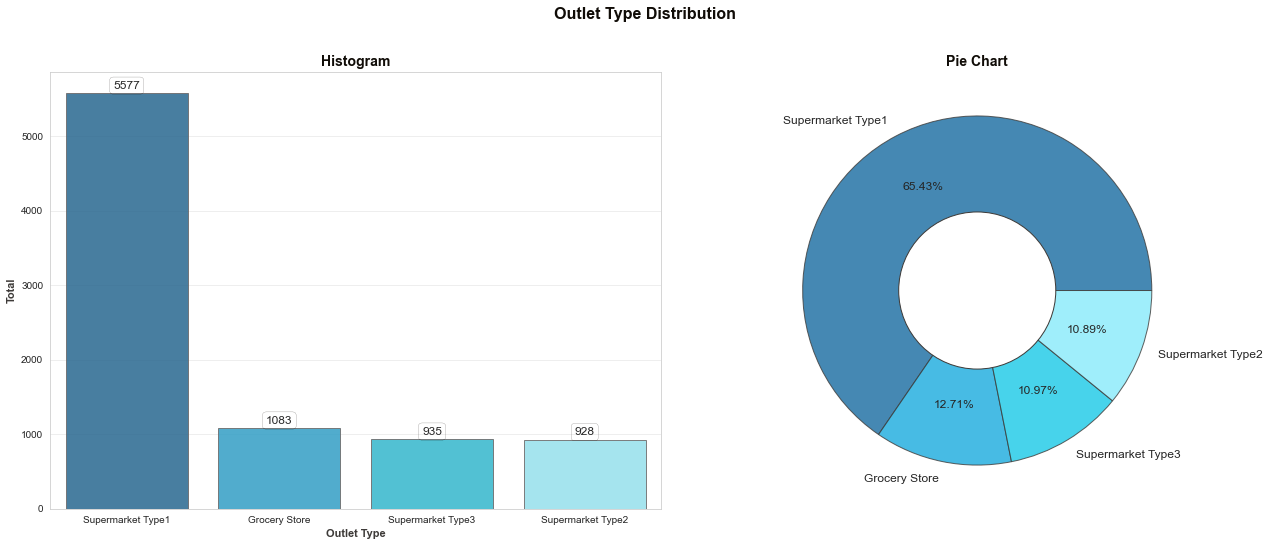

In [15]:
# --- Setting Colors, Labels, Order ---
colors=cyan_grad[1:5]
labels=df['Outlet_Type'].dropna().unique()
order=df['Outlet_Type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Type Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Type', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', 
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Outlet_Type'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 24)
print('\033[1m'+'.: Outlet Type Total :.'+'\033[0m')
print('\033[36m*' * 24+'\033[0m')
df.Outlet_Type.value_counts(dropna=False)

In [16]:
# Continuous Variable

# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.000000,12.857645,4.643456,4.555000,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.000000,0.066132,0.051598,0.000000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.000000,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.000000,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.000000,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


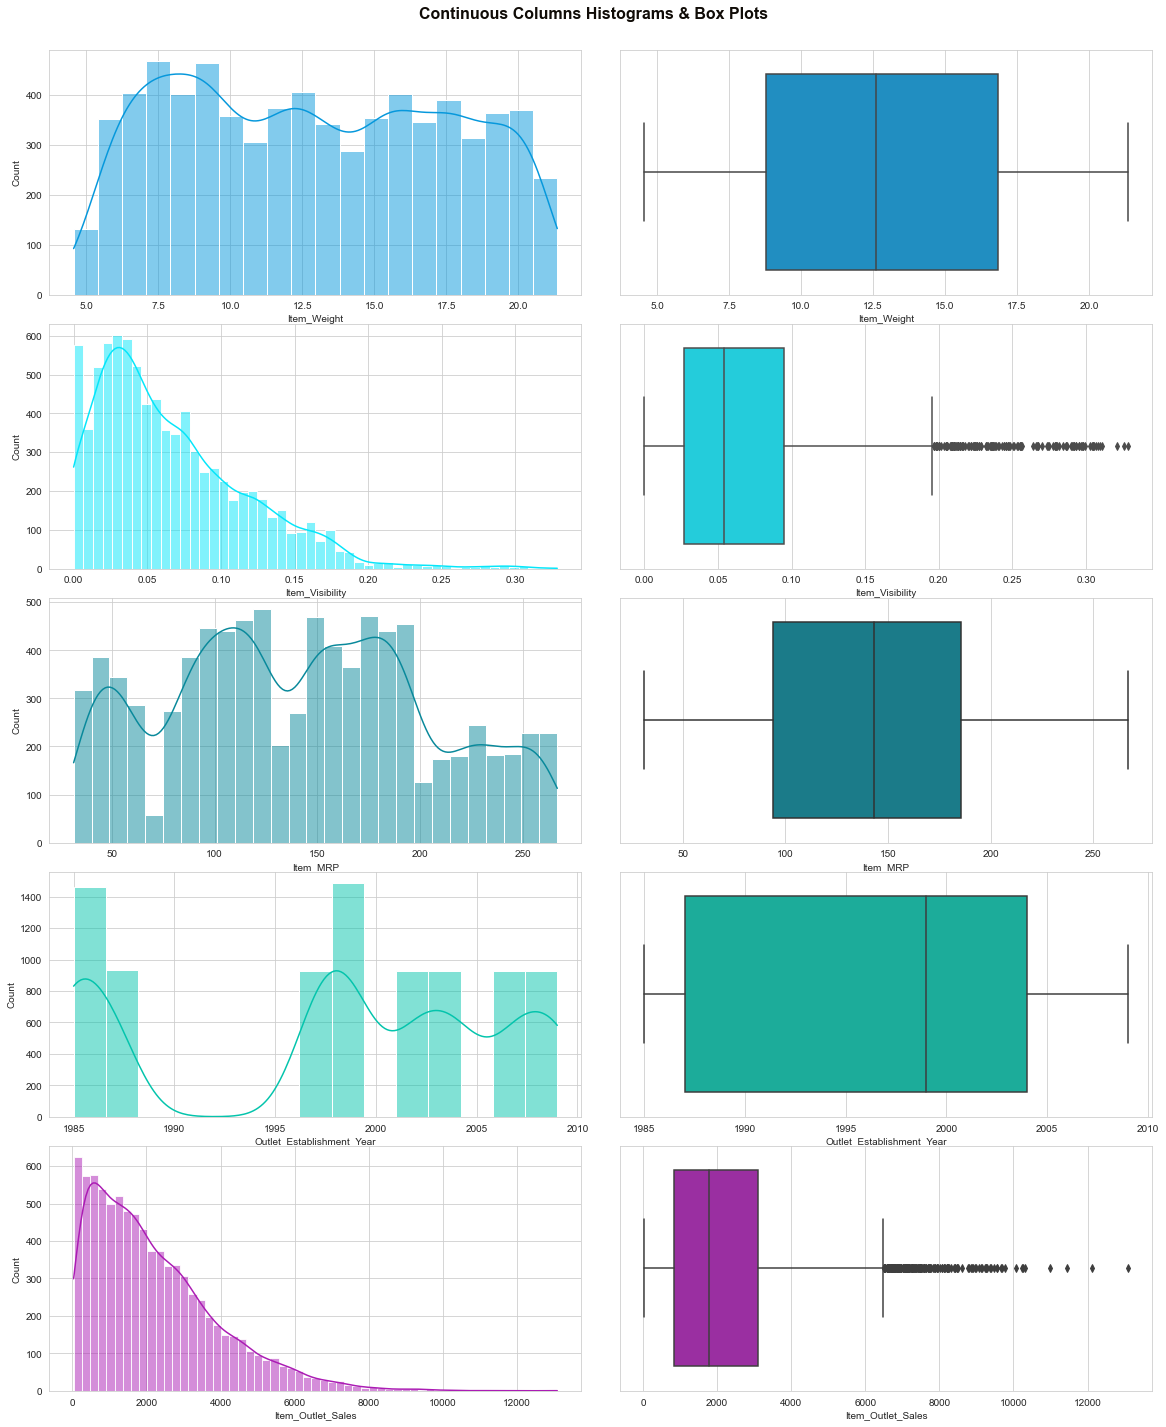

In [17]:
# --- Plot Size ---
fig, axs = plt.subplots(5, 2, figsize=(16, 20))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Continuous Columns Histograms & Box Plots', fontweight='bold', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])

# --- Histogram of Continuous Variables (Row 1) ---
sns.histplot(data=df, x='Item_Weight', kde=True, ax=axs[0, 0], color=color_mix[0])
sns.boxplot(data=df, x='Item_Weight', ax=axs[0, 1], color=color_mix[0]);

# --- Histogram of Continuous Variables (Row 2) ---
sns.histplot(data=df, x='Item_Visibility', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.boxplot(data=df, x='Item_Visibility', ax=axs[1, 1], color=color_mix[1])

# --- Histogram of Continuous Variables (Row 3) ---
sns.histplot(data=df, x='Item_MRP', kde=True, ax=axs[2, 0], color=color_mix[2])
sns.boxplot(data=df, x='Item_MRP', ax=axs[2, 1], color=color_mix[2])

# --- Histogram of Continuous Variables (Row 4) ---
sns.histplot(data=df, x='Outlet_Establishment_Year', kde=True, ax=axs[3, 0], color=color_mix[3])
sns.boxplot(data=df, x='Outlet_Establishment_Year', ax=axs[3, 1], color=color_mix[3])

# --- Histogram of Continuous Variables (Row 5) ---
sns.histplot(data=df, x='Item_Outlet_Sales', kde=True, ax=axs[4, 0], color=color_mix[4])
sns.boxplot(data=df, x='Item_Outlet_Sales', ax=axs[4, 1], color=color_mix[4]);

In [18]:
# --- Skewness of Continuous Variables ---
print('\033[36m\033[1m'+'.: Continuous Columns Skewness :.'+'\033[0m')
print('\033[36m*' * 34+'\033[0m')
df.select_dtypes(exclude='object').skew(axis = 0, skipna = True)

.: Continuous Columns Skewness :.
**********************************


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [19]:
#If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [20]:
# --- Kurtosis of Continuous Variables ---
print('\033[36m\033[1m'+'.: Continuous Columns Kurtosis :.'+'\033[0m')
print('\033[36m*' * 34+'\033[0m')
df.select_dtypes(exclude='object').kurt(axis = 0, skipna = True)

.: Continuous Columns Kurtosis :.
**********************************


Item_Weight                 -1.227766
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

In [21]:
#Kurtosis values used to show tailedness of a column. The value of normal distribution (mesokurtotic) should be equal to 3. If kurtosis value is more than 3, it is called leptokurtic. Meanwhile, if kurtosis value is less than 3, then it is called platikurtic.

*******************************************
.: Total Missing Values in each Columns :.
*******************************************


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

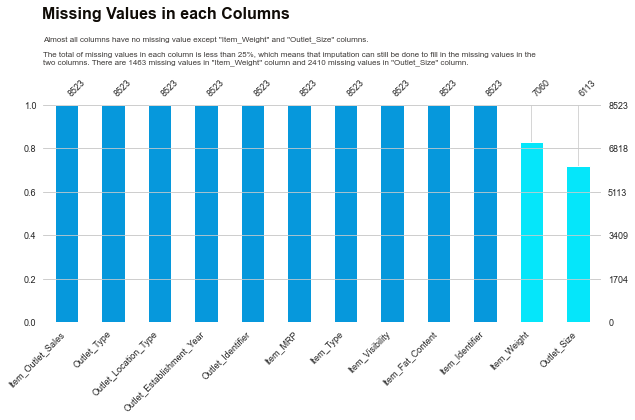

In [22]:
# --- Plot Missing Values ---
mso.bar(df, fontsize=9, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0],
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[1], color_mix[1]], 
        figsize=(10, 4), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.suptitle('Missing Values in each Columns', fontweight='heavy', x=0.124, y=1.22, ha='left',fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Almost all columns have no missing value except "Item_Weight" and "Outlet_Size" columns.\n\nThe total of missing values in each column is less than 25%, which means that imputation can still be done to fill in the missing values in the\ntwo columns. There are 1463 missing values in "Item_Weight" column and 2410 missing values in "Outlet_Size" column.\n', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.grid(axis='both', alpha=0);

# --- Total Missing Values in each Columns ---
print('\033[36m*' * 43)
print('\033[1m'+'.: Total Missing Values in each Columns :.'+'\033[0m')
print('\033[36m*' * 43+'\033[0m')
df.isnull().sum()

In [23]:
# Data Pre-processing

In [24]:
#Handling Dirty data 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')

In [25]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')

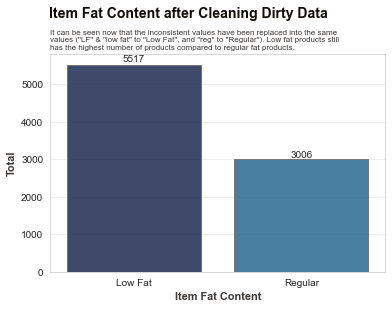

In [26]:
# --- Creating Bar Chart ---
fig, ax = plt.subplots()
ax = sns.countplot(x='Item_Fat_Content', data=df, palette=cyan_grad, edgecolor=black_grad[2], alpha=0.85)

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()*1.015,rect.get_height(), horizontalalignment='center', 
             fontsize=10)
fig.set_size_inches(6, 4)
plt.suptitle('Item Fat Content after Cleaning Dirty Data', fontweight='heavy', x=0.122, y=1.045, ha='left', fontsize='14',
             fontfamily='sans-serif', color=black_grad[0])
plt.title('It can be seen now that the inconsistent values have been replaced into the same\nvalues ("LF" & "low fat" to "Low Fat", and "reg" to "Regular"). Low fat products still\nhas the highest number of products compared to regular fat products.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.xlabel('Item Fat Content', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', alpha=0.4);

In [27]:
#Handling missing values
df.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,nan,555
5,Supermarket Type1,nan,1305


In [28]:
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan,'Small')

In [29]:
df.groupby(['Outlet_Type','Outlet_Size'],dropna = False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'],ascending=False).style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,901
3,Supermarket Type1,Small,1512
2,Supermarket Type1,Medium,930
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935
1,Supermarket Type1,High,932


In [30]:
df[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='PuBu').set_properties(**{'font-family': 'Segoe UI'})

,Item_Identifier,Item_Weight
118,DRA12,11.600000
2879,DRA24,nan
1148,DRA24,19.350000
6057,DRA59,nan
1876,DRA59,8.270000
3733,DRB01,nan
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000


In [31]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')

In [32]:
df[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='PuBu').set_properties(**{'font-family': 'Segoe UI'})

,Item_Identifier,Item_Weight
118,DRA12,11.600000
1148,DRA24,19.350000
1876,DRA59,8.270000
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000
103,DRB48,16.750000
1,DRC01,5.920000
772,DRC12,17.850000


In [33]:
# --- Print Dataset Info ---
print('\033[36m\033[1m'+'.: Check Missing Values Left :.')
print('\033[0m\033[36m*' * 32+'\033[0m')

new_df = df[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])
nan_values = new_df[new_df['Item_Weight'].isna()]
print(nan_values)                                                                            

.: Check Missing Values Left :.
********************************
     Item_Identifier  Item_Weight
4187           FDE52          NaN
1922           FDK57          NaN
927            FDN52          NaN
5022           FDQ60          NaN


In [34]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

************************************************************
.: Total Missing Values in each Columns After Imputation :.
************************************************************


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

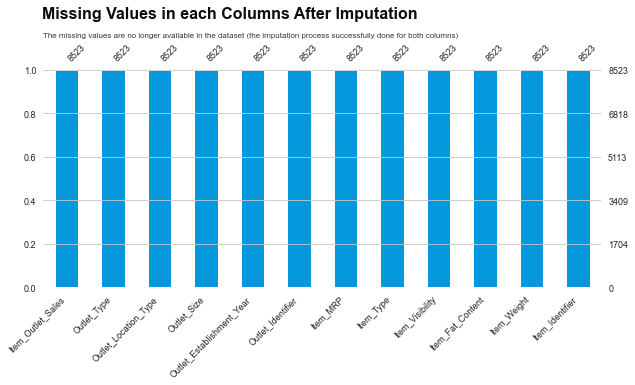

In [35]:
# --- Plot Missing Values After Imputation ---
mso.bar(df, fontsize=9, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0], 
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0], 
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0]], 
              figsize=(10, 4), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.suptitle('Missing Values in each Columns After Imputation', fontweight='heavy', x=0.124, y=1.1, ha='left',
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])
plt.title('The missing values are no longer available in the dataset (the imputation process successfully done for both columns)', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.grid(axis='both', alpha=0);

# --- Total Missing Values in each Columns After Imputation ---
print('\033[36m*' * 60)
print('\033[1m'+'.: Total Missing Values in each Columns After Imputation :.'+'\033[0m')
print('\033[36m*' * 60+'\033[0m')

df.isnull().sum()

In [36]:
#Handling Outliers

new_df = df[['Item_Visibility','Item_Outlet_Sales']].copy()

In [37]:
#Using Log transformation

new_df['Item_Visibility_log'] = np.log(new_df['Item_Visibility'])
new_df['Item_Outlet_Sales_log'] = np.log(new_df['Item_Outlet_Sales'])

In [38]:
#Using Square Root transformation

new_df['Item_Visibility_SQRT'] = np.sqrt(new_df['Item_Visibility'])
new_df['Item_Outlet_Sales_SQRT'] = np.sqrt(new_df['Item_Outlet_Sales'])

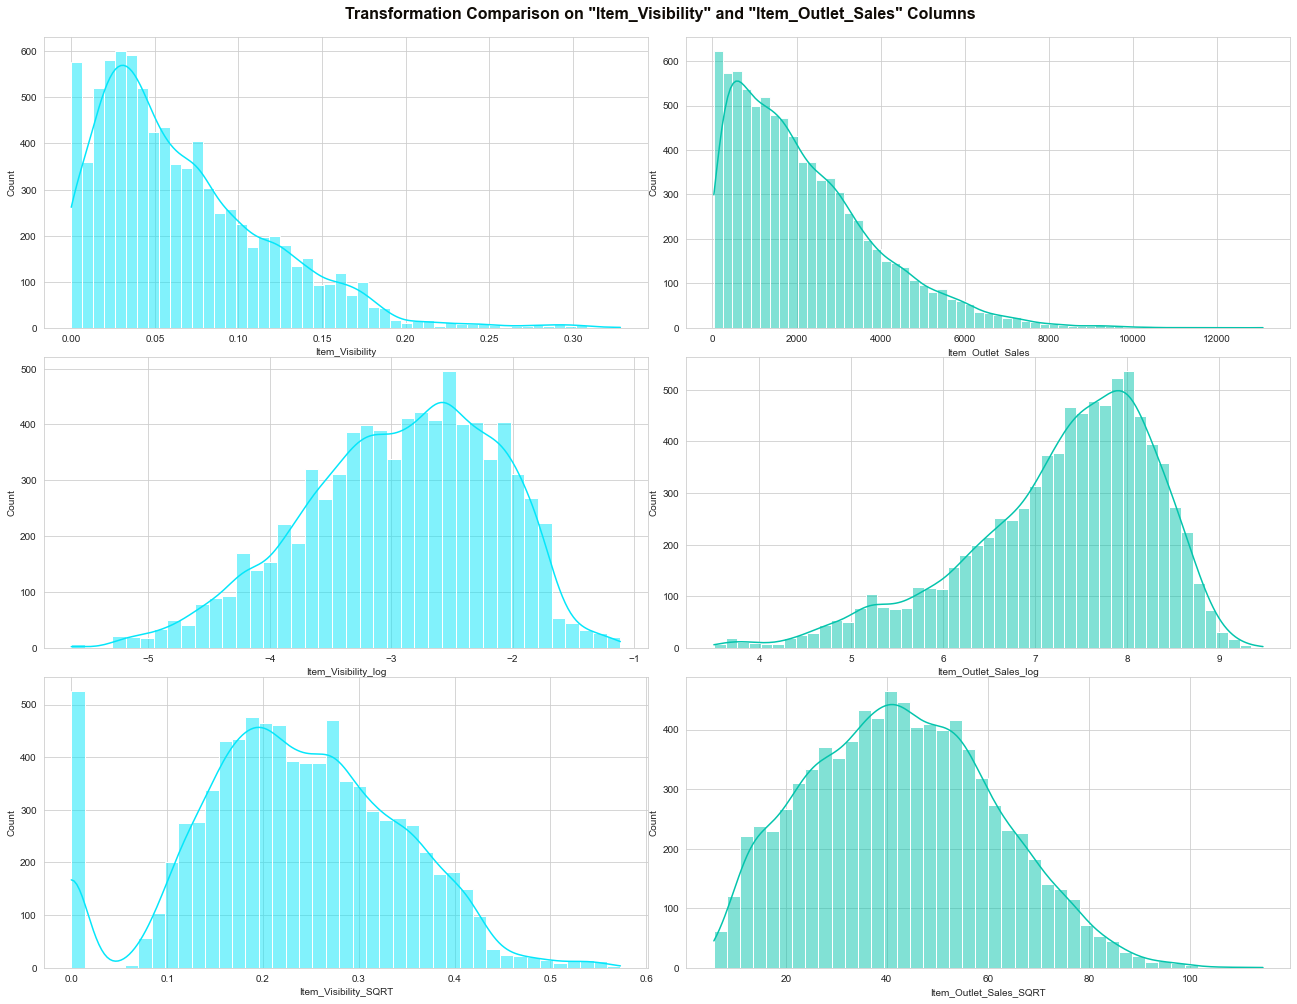

In [39]:
# --- Plot Size ---
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Transformation Comparison on "Item_Visibility" and "Item_Outlet_Sales" Columns', 
             fontweight='bold', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Histograms of "Item_Visibility" Transformation (Column 1) ---
sns.histplot(data=new_df, x='Item_Visibility', kde=True, ax=axs[0, 0], color=color_mix[1])
sns.histplot(data=new_df, x='Item_Visibility_log', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.histplot(data=new_df, x='Item_Visibility_SQRT', kde=True, ax=axs[2, 0], color=color_mix[1])

# --- Histograms of "Item_Outlet_Sales" Transformation (Column 2) ---
sns.histplot(data=new_df, x='Item_Outlet_Sales', kde=True, ax=axs[0, 1], color=color_mix[3])
sns.histplot(data=new_df, x='Item_Outlet_Sales_log', kde=True, ax=axs[1, 1], color=color_mix[3])
sns.histplot(data=new_df, x='Item_Outlet_Sales_SQRT', kde=True, ax=axs[2, 1], color=color_mix[3]);

In [40]:
print('\033[36m\033[1m'+'.: Transformation Skewness Values :.'+'\033[0m')
print('\033[36m*' * 37+'\033[0m')
new_df.skew(axis = 0, skipna = True)

.: Transformation Skewness Values :.
*************************************


Item_Visibility           1.167091
Item_Outlet_Sales         1.177531
Item_Visibility_log            NaN
Item_Outlet_Sales_log    -0.887753
Item_Visibility_SQRT     -0.098056
Item_Outlet_Sales_SQRT    0.234676
dtype: float64

In [41]:
# --- Apply Square Root Transformation on Real Dataset ---
df['Item_Visibility_sqrt'] = np.sqrt(df['Item_Visibility'])
df['Item_Outlet_Sales_sqrt'] = np.sqrt(df['Item_Outlet_Sales'])

# --- Drop Original Columns ---
df = df.drop(columns=['Item_Visibility', 'Item_Outlet_Sales'])

<Axes: >

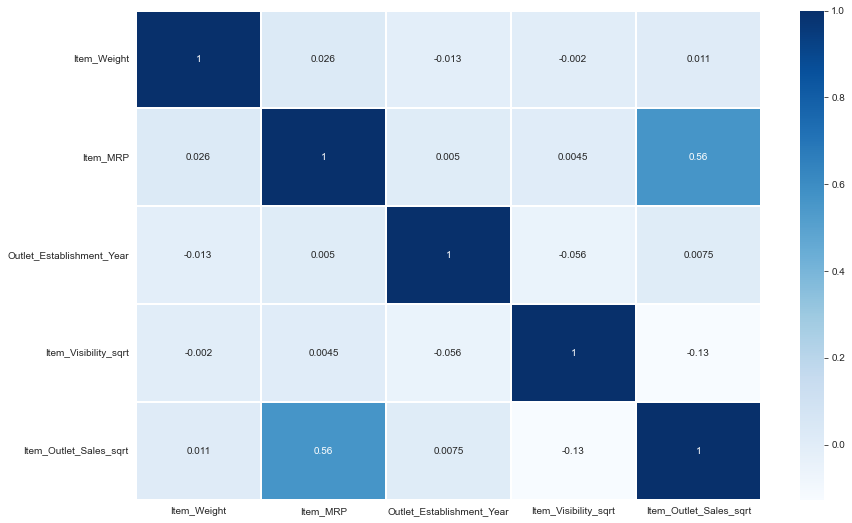

In [42]:
#EDA

plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.1)

In [43]:
# --- Group Item Type and Item ID based on Item Fat Content ---
dsreg = df.loc[df['Item_Fat_Content'] == 'Regular']
dsreg = dsreg[['Item_Type', 'Item_Identifier']]
dsreg = dsreg.groupby(['Item_Type'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Item_Identifier'], ascending=False)


In [44]:
dslf = df.loc[df['Item_Fat_Content'] == 'Low Fat']
dslf = dslf[['Item_Type', 'Item_Identifier']]
dslf = dslf.groupby(['Item_Type'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Item_Identifier'], ascending=False)

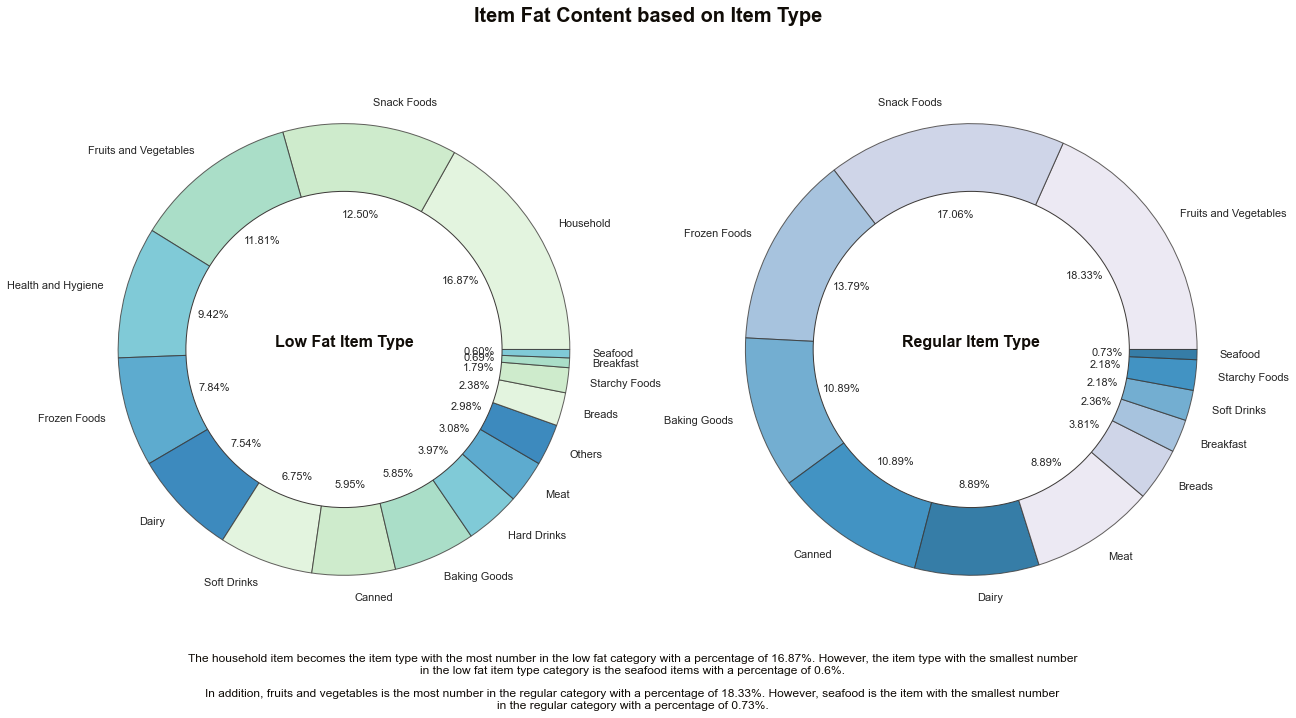

In [45]:
# --- Figure Size & Title Settings ---
plt.figure(figsize=(18, 10))
plt.suptitle('Item Fat Content based on Item Type', fontweight='heavy', fontsize=20, fontfamily='sans-serif', 
             color=black_grad[0])

# --- 1st Donut Chart ---
plt.subplot(1, 2, 1)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.pie(dslf['Item_Identifier'], labels=dslf['Item_Type'], colors=sns.color_palette('GnBu'), autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':11})
centre = plt.Circle((0, 0), 0.7, fc='white', edgecolor=black_grad[1])
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.text(0, 0, 'Low Fat Item Type', fontsize=16, ha='center', va='bottom', wrap=True, color=black_grad[0], 
         fontweight='bold', fontfamily='sans-serif')

# --- 2nd Donut Chart ---
plt.subplot(1, 2, 2)
plt.pie(dsreg['Item_Identifier'], labels=dsreg['Item_Type'], colors=sns.color_palette('PuBu'), autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':11})
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
centre = plt.Circle((0, 0), 0.7, fc='white', edgecolor=black_grad[1])
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.text(0, 0, 'Regular Item Type', fontsize=16, ha='center', va='bottom', wrap=True, color=black_grad[0], 
         fontweight='bold', fontfamily='sans-serif')

# --- Bottom Text (Explanation Text) ---
plt.text(-1.5, -1.6, 'The household item becomes the item type with the most number in the low fat category with a percentage of 16.87%. However, the item type with the smallest number\nin the low fat item type category is the seafood items with a percentage of 0.6%.\n\nIn addition, fruits and vegetables is the most number in the regular category with a percentage of 18.33%. However, seafood is the item with the smallest number\nin the regular category with a percentage of 0.73%.', 
         fontsize=12, ha='center', va='bottom', wrap=True, color=black_grad[0]);

In [52]:
labels = ['Tier 1','Tier 2','Tier 3']
label_mart = np.array([0,1,2,3])
label_mart2 = ['Grocery Store','Supermarket Type 1','Supermarket Type 2','Supermarket Type 3']



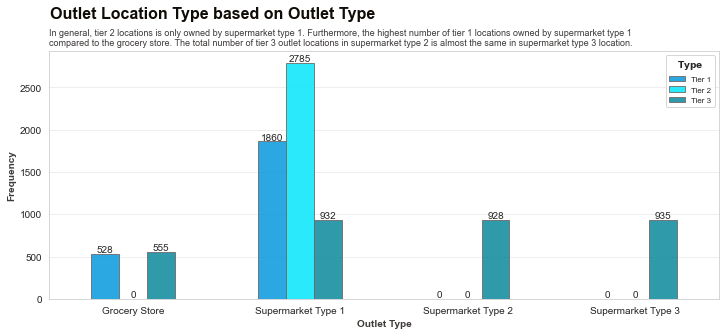

In [53]:
# --- Creating Bar Chart ---
ax = pd.crosstab(df.Outlet_Type, df.Outlet_Location_Type).plot(kind='bar', figsize=(10, 6), color=color_mix[0:3], 
                                                               alpha=0.85, edgecolor=black_grad[2])

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20, rect.get_height(), horizontalalignment='center', 
             fontsize=10)

plt.suptitle('Outlet Location Type based on Outlet Type', fontweight='heavy', x=0.057, y=0.99, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('In general, tier 2 locations is only owned by supermarket type 1. Furthermore, the highest number of tier 1 locations owned by supermarket type 1\ncompared to the grocery store. The total number of tier 3 outlet locations in supermarket type 2 is almost the same in supermarket type 3 location.', 
          fontsize='9', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Outlet Type', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Frequency', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.xticks(label_mart, label_mart2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Type}$', fontsize='8', title_fontsize='9', loc='upper right', frameon=True);

In [54]:
# Outlet Identifier based on Outlet Size

labels = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
label_mart = np.array([0,1,2])
label_mart2 = ['High','Medium','Small']



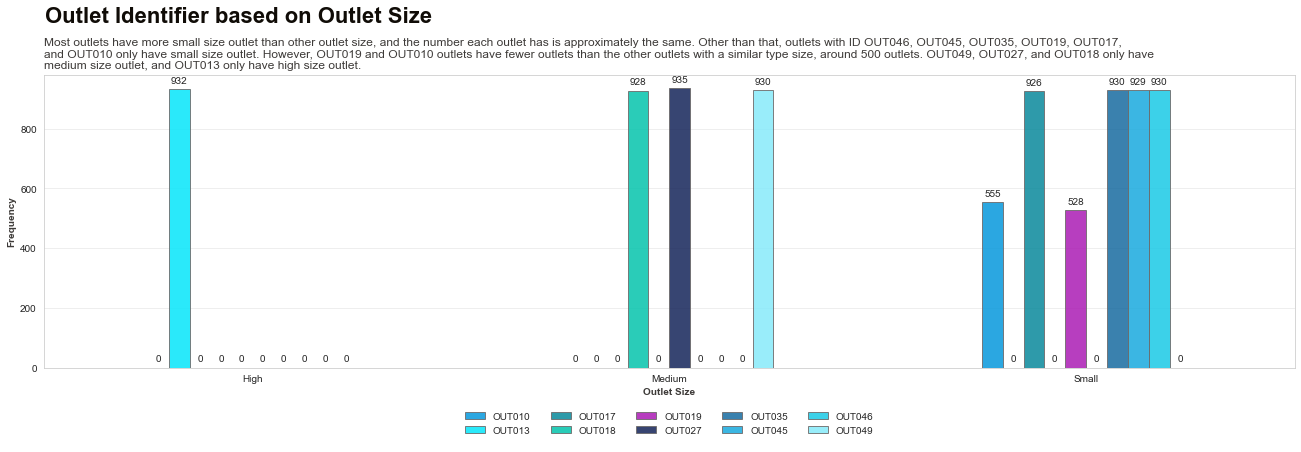

In [55]:
# --- Creating Bar Chart ---
ax = pd.crosstab(df.Outlet_Size, 
                 df.Outlet_Identifier).plot(kind='bar', figsize=(18, 6), alpha=0.85, edgecolor=black_grad[2],
                                            color=['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4', '#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA'])

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20, rect.get_height(), horizontalalignment='center', 
             fontsize=10)

plt.suptitle('Outlet Identifier based on Outlet Size', fontweight='heavy', x=0.0275, y=1, ha='left', fontsize='22', 
             fontfamily='sans-serif', color=black_grad[0]) 
plt.title('Most outlets have more small size outlet than other outlet size, and the number each outlet has is approximately the same. Other than that, outlets with ID OUT046, OUT045, OUT035, OUT019, OUT017,\nand OUT010 only have small size outlet. However, OUT019 and OUT010 outlets have fewer outlets than the other outlets with a similar type size, around 500 outlets. OUT049, OUT027, and OUT018 only have\nmedium size outlet, and OUT013 only have high size outlet.', 
          fontsize='12', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.01, 1, 1.025])
plt.xlabel('Outlet Size', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Frequency', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.xticks(label_mart, label_mart2, rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=10)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0);

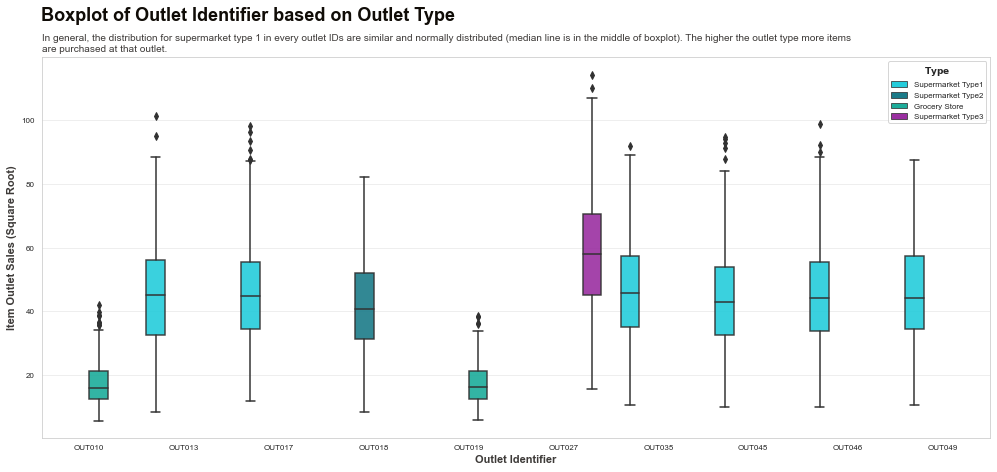

In [57]:
# --- Labels Settings ---
order=['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']

# --- Creating Box Plot based on Outlet Type ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Boxplot of Outlet Identifier based on Outlet Type', fontweight='heavy', x=0.124, y=0.98, ha='left', 
             fontsize='18', fontfamily='sans-serif', color=black_grad[0])
plt.title('In general, the distribution for supermarket type 1 in every outlet IDs are similar and normally distributed (median line is in the middle of boxplot). The higher the outlet type more items\nare purchased at that outlet.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales_sqrt', hue='Outlet_Type', data=df, order=order, ax=ax, 
            palette=color_mix[1:], boxprops=dict(alpha=0.9), linewidth=1.5)
plt.xlabel('Outlet Identifier', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Item Outlet Sales (Square Root)', fontweight='bold', fontsize='11', fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks(fontsize='8')
plt.yticks(fontsize='8')
plt.legend(title='$\\bf{Type}$', fontsize='8', title_fontsize='9', loc='upper right', frameon=True)
plt.grid(axis='y', alpha=0.4)
plt.show()

In [58]:
# Feature engineering

df['Item_Category'] = df['Item_Identifier'].astype(str).str[:2]
df['Item_Category'] = df['Item_Category'].replace(['FD','DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])

In [59]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_sqrt,Item_Outlet_Sales_sqrt,Item_Category
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.126678,61.115775,Food
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.138846,21.057607,Drink
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.129461,45.795961,Food
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,0.000000,27.062520,Food
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0.000000,31.538947,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,0.238293,52.710373,Food
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,0.216754,23.436830,Food
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,0.187580,34.541477,Non-Consumable
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.381078,42.960419,Food


In [60]:
# --- Creating 'Age_Outlet' Column ---
df['Age_Outlet'] = 2022-df['Outlet_Establishment_Year']

In [61]:
# Binning 

bin = [1,10,20,100]
outlet_cat = ['New Outlet','Moderate Outlate','Old Outlet']
df['Outlet_Category'] = pd.cut(df['Age_Outlet'],bins = bin,labels=outlet_cat)

In [62]:
#Label Encoding

df['Item_Fat_Content_Encoding'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular'], ['0', '1'])

In [63]:
# --- Perform One-Hot Encoding ---
a = pd.get_dummies(df['Item_Category'], prefix = 'Item_Category')
b = pd.get_dummies(df['Outlet_Category'], prefix = 'Outlet_Category')
c = pd.get_dummies(df['Outlet_Size'], prefix = 'Outlet_Size')
d = pd.get_dummies(df['Outlet_Location_Type'], prefix = 'Outlet_Location_Type')
e = pd.get_dummies(df['Outlet_Type'], prefix = 'Outlet_Type')

# --- Concat w/ Main Dataframe ---
frames = [df, a, b, c, d, e]
ds = pd.concat(frames, axis = 1)

In [64]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category', 
                        'Outlet_Category', 'Outlet_Establishment_Year'])

In [65]:
# --- Export Cleaned Dataframe into `.csv` File ---
df.to_csv('train_v9rqX0R_new_caesarmario.csv', index=False)